# Classifying Iris plants with KNN model

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading dataset

In [2]:
df = pd.read_csv('data/Iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df = df.drop('Id', axis = 1)

In [5]:
df.shape

(150, 5)

### EDA

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


<AxesSubplot: xlabel='Species', ylabel='count'>

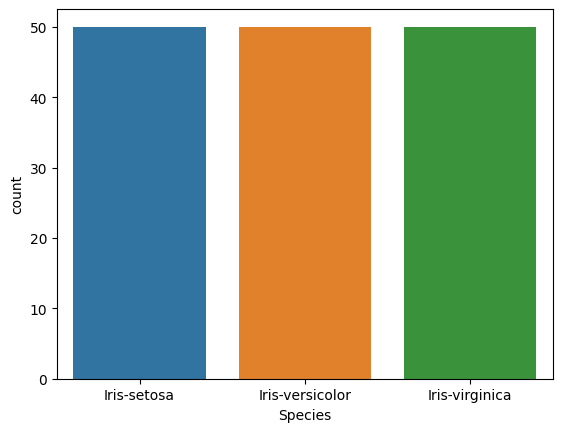

In [7]:
#checking balance of the dataset
sns.countplot(x='Species', data=df)

* This is a balanced dataset

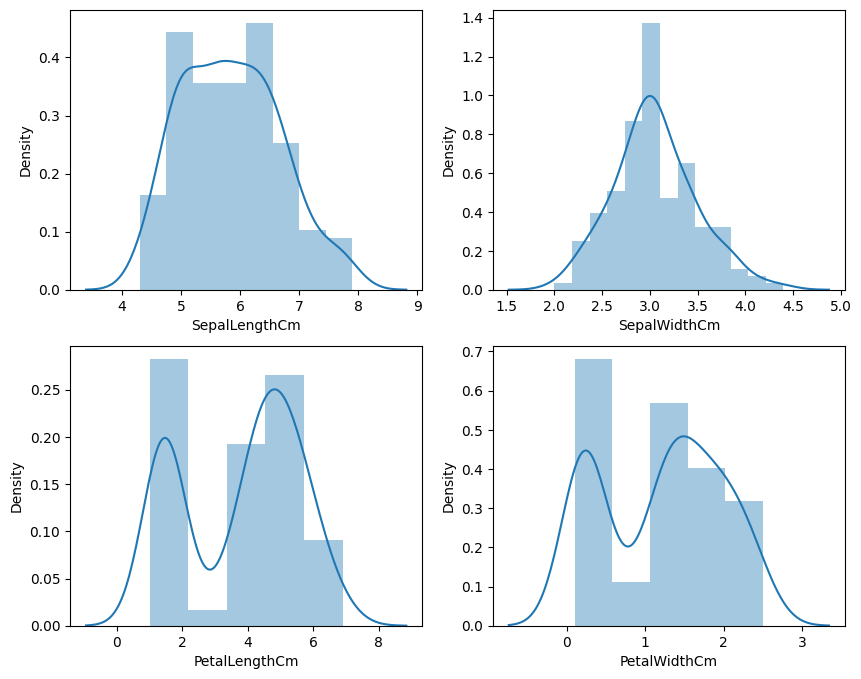

In [8]:
#checking distributions of features

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

plt.figure(figsize=(10,8))
for i, cols in enumerate(features):
    plt.subplot(2,2,i+1)
    #sns.histplot(df[num_cols[i]], kde=True, stat='density', kde_kws=dict(cut=3))
    sns.distplot(df[features[i]])

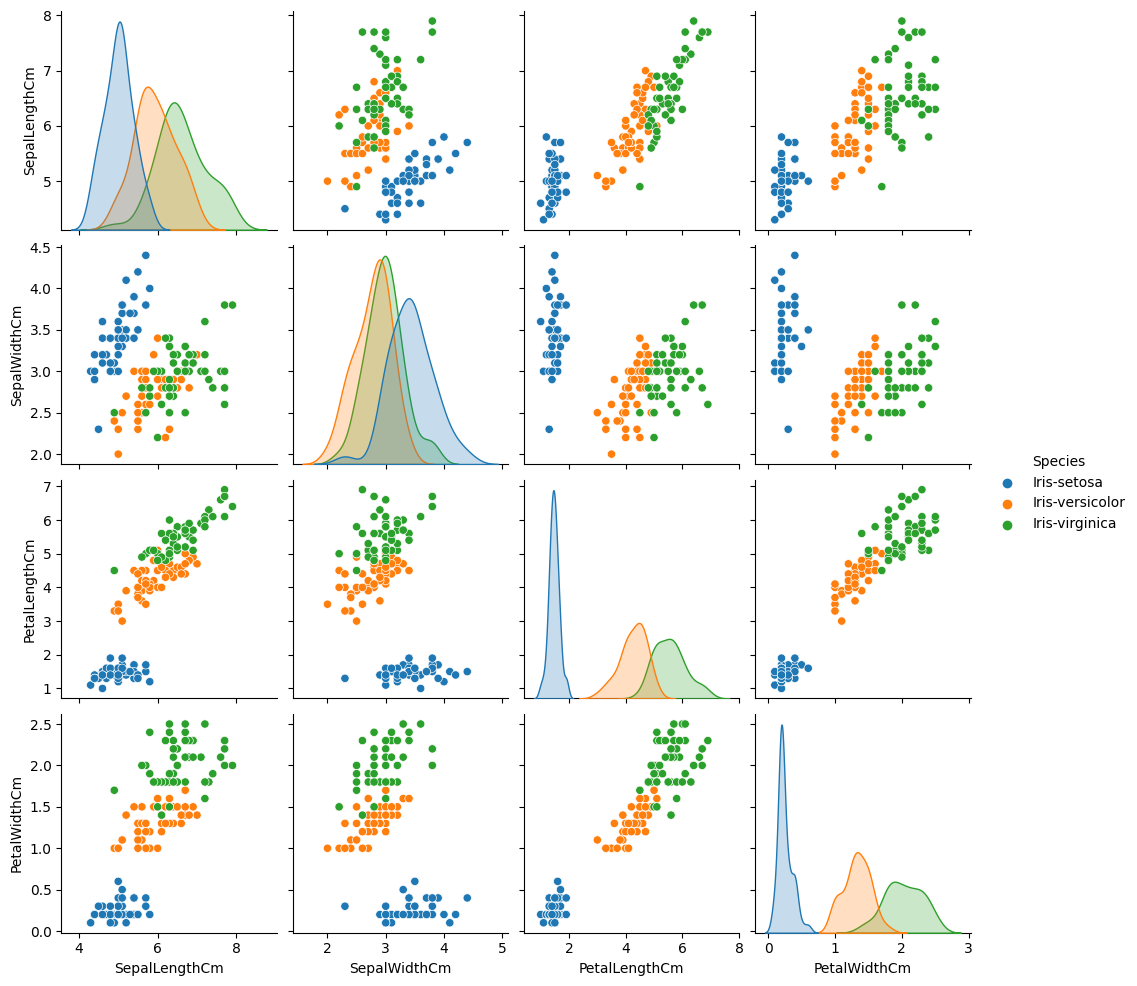

In [16]:
sns.pairplot(df, hue='Species')

### Data preprocessing

In [9]:
#checking for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#checking for duplicted rows
df.duplicated().sum()

3

In [11]:
df.loc[df.duplicated(keep=False), :]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
9,4.9,3.1,1.5,0.1,Iris-setosa
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
101,5.8,2.7,5.1,1.9,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [19]:
#analyzing target
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
#label encoding Species
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)
df.Species.unique()

array([0, 1, 2])

In [61]:
#seprating features and target
X = df.drop('Species', axis=1)
y = df['Species']

In [62]:
#splitting datset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [63]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model training

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [65]:
#finding best value for k
from sklearn.model_selection import GridSearchCV

k_range = range(1,40)
params = {'n_neighbors':k_range}

grid = GridSearchCV(knn, param_grid=params, cv=10, scoring='accuracy')

In [66]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40)}, scoring='accuracy')

In [67]:
grid.best_params_

{'n_neighbors': 10}

In [68]:
grid.best_score_

0.9509090909090909

In [69]:
#model training with best k value
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

### Model evaluation

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = knn.predict(X_test)


print("Confustion matrix : ")
print(confusion_matrix(y_test, y_pred))
print()
print ("The accuracy of model is : ", accuracy_score(y_test, y_pred))
print()



Confustion matrix : 
[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]

The accuracy of model is :  0.9777777777777777



In [72]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.94      1.00      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

